In [4]:
# # 多行输出sss
# from IPython.core.interactiveshell import InteractiveShell 
# InteractiveShell.ast_node_interactivity = 'all' # 默认为'last'
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

X_b = np.c_[np.ones((100,1)), X]

In [5]:
# import numpy as np
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

In [6]:
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [7]:
theta


array([[3.91819763],
       [3.04556269]])

In [8]:
# 随机梯度下降
n_epochs = 50
t0, t1 = 5, 50  #学习计划超参数

In [9]:
def learning_schedule(t):
    return t0/(t1+t)

In [10]:
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [11]:
theta

array([[3.98016462],
       [3.05158878]])

In [12]:
from sklearn.linear_model import SGDRegressor
# sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg = SGDRegressor(loss='squared_loss',
                       penalty='l2',
                       alpha=0.01,
                       max_iter=50)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [13]:
sgd_reg.intercept_
sgd_reg.coef_

array([3.25645659])

In [14]:
# 小批量梯度下降
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [16]:
X[0]
X_poly[0]

array([-1.47373122,  2.17188371])

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.19325669]), array([[0.89541321, 0.45717038]]))

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def plot_learning_curves(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    train_errors, test_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_pre = model.predict(x_train[:m])
        y_test_pre = model.predict(x_test)
        train_errors.append(mean_squared_error(y_train_pre, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_pre, y_test))

    plt.plot(np.sqrt(train_errors), 'r-+', lw=2, label='train')
    plt.plot(np.sqrt(test_errors), 'b-', lw=2, label='test')
    plt.legend(loc='upper right')
    plt.ylim(0, 3)
    plt.show()

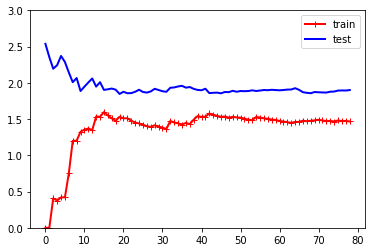

In [19]:
lr = LinearRegression()
plot_learning_curves(lr, X, y)

In [25]:
# 正则线性模型

# 岭回归
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[2.4]])

array([[6.15568512]])

In [24]:
# 随机梯度下降
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[2.4]])

array([6.11039155])

In [26]:
# Lasso回归
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[2.4]])

array([6.09630402])

In [27]:
# 弹性网络
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)#混合比例为0.5
elastic_net.fit(X,y)
elastic_net.predict([[2.4]])

array([6.09673093])

In [33]:
# zip 早期停止发
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       warm_start=True,
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005,
                       random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train_poly_scaled' is not defined